# EDA: Diagnosing Diabetes

In this project, you'll imagine you are a data scientist interested in exploring data that looks at how certain diagnostic factors affect the diabetes outcome of women patients.

You will use your EDA skills to help inspect, clean, and validate the data.

**Note**: This [dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains the following columns:

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration per 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure
- `SkinThickness`: Triceps skinfold thickness
- `Insulin`: 2-Hour serum insulin
- `BMI`: Body mass index
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1)

Let's get started!

## Initial Inspection

1. First, familiarize yourself with the dataset [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

   Look at each of the nine columns in the documentation.
   
   What do you expect each data type to be?

Expected data type for each column:

- `Pregnancies`: integer
- `Glucose`: float
- `BloodPressure`: float
- `SkinThickness`: float
- `Insulin`: float
- `BMI`: float
- `DiabetesPedigreeFunction`: I don't know 
- `Age`: integer
- `Outcome`: binary (0 or 1 but not an integer))

2. Next, let's load in the diabetes data to start exploring.

   Load the data in a variable called `diabetes_data` and print the first few rows.
   
   **Note**: The data is stored in a file called `diabetes.csv`.

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
# import statsmodels.api as sm

# load in data
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3. How many columns (features) does the data contain?

In [350]:
# print number of columns
len(data.columns)

9

4. How many rows (observations) does the data contain?

In [351]:
# print number of rows
len(df)

768

## Further Inspection

5. Let's inspect `diabetes_data` further.

   Do any of the columns in the data contain null (missing) values?

In [352]:
# find whether columns contain null values

sum(data.isna().any(axis=1)) # returns the total number of rows with at least one NaN?

data.isna().sum() # returns the sum of NaN in each column

data.info() # see it's Non-Null Count column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


6. If you answered no to the question above, not so fast!

   While it's technically true that none of the columns contain null values, that doesn't necessarily mean that the data isn't missing any values.
   
   When exploring data, you should always question your assumptions and try to dig deeper.
   
   To investigate further, calculate summary statistics on `diabetes_data` using the `.describe()` method.

In [353]:
# perform summary statistics
data.describe(include='all') # see it's count row


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,494
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,NaN


7. Looking at the summary statistics, do you notice anything odd about the following columns?

   - `Glucose`
   - `BloodPressure`
   - `SkinThickness`
   - `Insulin`
   - `BMI`

**Your response to question 7**:

8. Do you spot any other outliers in the data?

**Your response to question 8**:

9. Let's see if we can get a more accurate view of the missing values in the data.

   Use the following code to replace the instances of `0` with `NaN` in the five columns mentioned:
   
   ```py
   diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
   ```

In [354]:
# replace instances of 0 with NaN

data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace({0:np.NaN})


10. Next, check for missing (null) values in all of the columns just like you did in Step 5.

    Now how many missing values are there?

In [355]:
# find whether columns contain null values after replacements are made

data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

11. Let's take a closer look at these rows to get a better idea of _why_ some data might be missing.

    Print out all the rows that contain missing (null) values.

In [356]:
# print rows with missing values
data[data.isna().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


12. Go through the rows with missing data. Do you notice any patterns or overlaps between the missing data?

**Your response to question 12**: Seems that every single row with at least one missing value also has a missing value in the insulin column. 

In [357]:
# print only rows where there isn't a missing value in the Insulin column but there are missing values in the other columns
# data[(data.Insulin.notna()) & (data.isna().sum(axis=1) > 0)] # gives the same outcome as below
data[(data.Insulin.notna()) & (data.isna().any(axis=1) > 0)]
# indeed, there are only two

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
371,0,118.0,64.0,23.0,89.0,NaN,1.731,21,0


13. Next, take a closer look at the data types of each column in `diabetes_data`.

    Does the result match what you would expect?

In [358]:
# print data types using .info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB


14. To figure out why the `Outcome` column is of type `object` (string) instead of type `int64`, print out the unique values in the `Outcome` column.

In [359]:
# print unique values of Outcome column
data.Outcome.value_counts()
# there is a value big "o", presumably "0" was intended

Outcome
0    494
1    268
O      6
Name: count, dtype: int64

15. How might you resolve this issue?

**Your response to question 15**: replace "O" with "0" and format as type cathegoric

In [360]:
data.Outcome = data.Outcome.replace({'O':'0'})

data.Outcome = pd.Categorical(data.Outcome, ['0','1'], ordered = False)

data.Outcome.unique(), data.Outcome.value_counts()


(['1', '0']
 Categories (2, object): ['0', '1'],
 Outcome
 0    500
 1    268
 Name: count, dtype: int64)

## Next Steps:

16. Congratulations! In this project, you saw how EDA can help with the initial data inspection and cleaning process. This is an important step as it helps to keep your datasets clean and reliable.

    Here are some ways you might extend this project if you'd like:
    - Use `.value_counts()` to more fully explore the values in each column.
    - Investigate other outliers in the data that may be easily overlooked.
    - Instead of changing the `0` values in the five columns to `NaN`, try replacing the values with the median or mean of each column.

(array([50., 92., 79., 64., 39., 16., 18., 11.,  4.,  3.,  2.,  8.,  3.,
         1.,  1.,  0.,  1.,  1.,  0.,  1.]),
 array([ 14. ,  55.6,  97.2, 138.8, 180.4, 222. , 263.6, 305.2, 346.8,
        388.4, 430. , 471.6, 513.2, 554.8, 596.4, 638. , 679.6, 721.2,
        762.8, 804.4, 846. ]),
 <BarContainer object of 20 artists>)

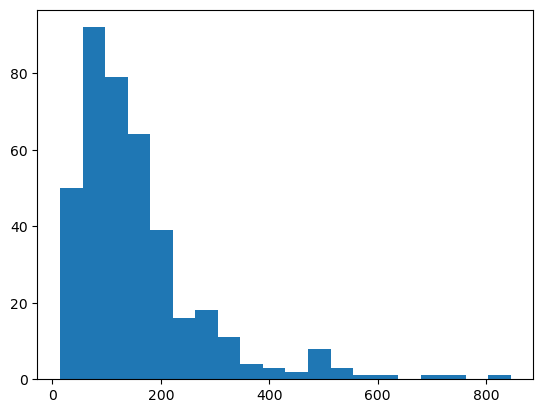

In [361]:
# investigation of the insulin values

plt.hist(data.Insulin, bins = 20)
# plt.ylim(0, 20)

# I don't conclude that the highest value is an outlier without further information since there are several smaller but close enough values. But I would advice to use non-parametric statistics. 

In [362]:
# changing data types of some columns is not possible because pd.NaN values can't be converted to int
data.Glucose = data.Glucose.astype('int')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

(array([111., 135., 103.,  75.,  68.,  57.,  50.,  45.,  38.,  28.,  24.,
         11.,   9.,  10.,   2.,   1.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17.]),
 <BarContainer object of 17 artists>)

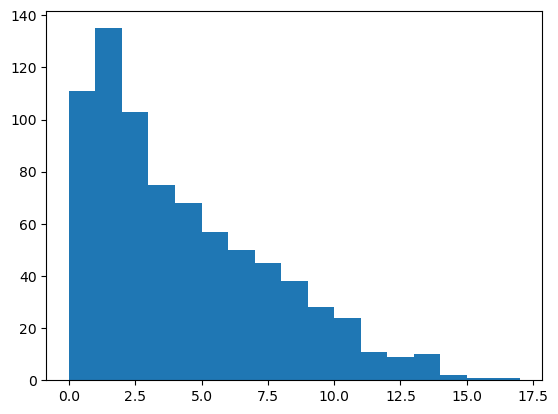

In [363]:
# investigating the Pregnancies values
plt.hist(data.Pregnancies, bins = 17)
# seems OK

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  0.,  5.,  6.,  7.,
        11.,  6., 14.,  6., 14., 20., 18., 13., 10., 16., 22., 12., 16.,
        16., 23., 20., 17., 27., 19., 31., 20.,  8., 15., 14., 16.,  7.,
        18., 16., 15., 11.,  6.,  5.,  6.,  8.,  4.,  4.,  3.,  3.,  1.,
         2.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  

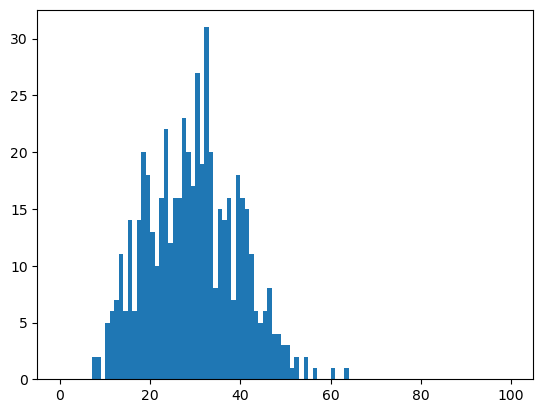

In [369]:
# investigating the SkinThickness values
# plt.hist(data.SkinThickness, bins = [n for n in range(101)])
# I recommend to replace the value 99 with np.NaN. otherwise looks OK. The distrubudien doesn't look normal though.
data.SkinThickness = data.SkinThickness.replace({99:np.NaN})
plt.hist(data.SkinThickness, bins = [n for n in range(101)])

In [370]:
# perform the Shapiro-Wilk test for normality on SkinThickness

st.shapiro(data.SkinThickness)

# rusult: definatelly not normal

ShapiroResult(statistic=nan, pvalue=1.0)

In [372]:
# sm.qqplot(data.SkinThickness, line='45')

In [373]:
# perform a Kolmogorov-Smirnov test
st.kstest(data.SkinThickness, 'norm')

KstestResult(statistic=nan, pvalue=nan)